# Imports

In [ ]:
import einops
import torch
print(torch.__version__)

In [3]:
from src.datasets.cats_dogs import DogsVsCats

# Dataset

In [4]:
ds = DogsVsCats(
    '/Users/paulwilson/research/data/dogs-vs-cats/train'
)

100%|██████████| 25000/25000 [00:19<00:00, 1296.42it/s]


In [5]:
ds.summary_statistics

100%|██████████| 25000/25000 [01:18<00:00, 316.73it/s]


{'mean': array([0.48832038, 0.45508093, 0.41697004], dtype=float32),
 'std': array([0.26010334, 0.25352332, 0.2561287 ], dtype=float32)}

In [6]:
ds.summary_statistics

{'mean': array([0.48832038, 0.45508093, 0.41697004], dtype=float32),
 'std': array([0.26010334, 0.25352332, 0.2561287 ], dtype=float32)}

In [25]:
ds.transform = None
ds.target_transform = ds.get_default_target_transform()

In [15]:
import matplotlib.pyplot as plt
import einops

In [24]:
plt.imshow(einops.rearrange(ds[1][0].numpy(), 'c h w -> h w c'))

AttributeError: numpy

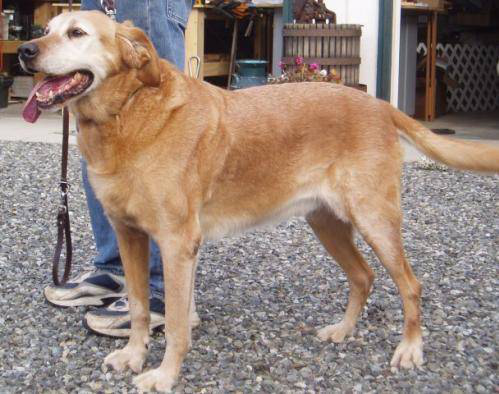

In [29]:
ds[150][0]

# Models

In [50]:
import torch
from torch.nn import functional as F

In [56]:
logits = torch.randn((3, 4))
logits

tensor([[-0.7870,  0.1969,  1.1465, -0.3412],
        [-0.1619,  0.5800, -0.3558,  0.0723],
        [-0.0411, -1.1427,  0.3068, -0.3105]])

In [57]:
probs = torch.nn.functional.softmax(logits)
probs

/var/folders/nq/48g19ycd2ts94m5gs3ln9s0c0000gn/T/ipykernel_64193/2048999838.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(logits)


tensor([[0.0823, 0.2202, 0.5690, 0.1285],
        [0.1928, 0.4048, 0.1588, 0.2436],
        [0.2847, 0.0946, 0.4032, 0.2175]])

In [64]:
preds = torch.argmax(probs, dim=-1, keepdim=True)
preds

tensor([[2],
        [1],
        [2]])

In [65]:
labels = torch.tensor([[0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0]])

In [67]:
labels = torch.argmax(labels, dim=-1, keepdim=True)

In [69]:
torch.sum(labels == preds).item()

2

In [6]:
from src.datasets.cats_dogs import DogsVsCats
dataset = DogsVsCats('/Users/paulwilson/research/data/dogs-vs-cats/train')
dataset.summary_statistics
import torch

100%|██████████| 25000/25000 [00:18<00:00, 1320.11it/s]


In [7]:
dataset.transform = dataset.get_default_transform(target_size=(256, 256), use_augmentations=True)

In [12]:
train, test = torch.utils.data.random_split(dataset, (int(0.8*len(dataset)), (int(0.2*len(dataset)))))

In [18]:
train.dataset.transform

Compose(
    RandomOrder(
    RandomResizedCrop(size=(256, 256), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
    RandomApply(
    p=0.5
    ColorJitter(brightness=[0.8, 1.2], contrast=[0.8, 1.2], saturation=[0.8, 1.2], hue=[-0.2, 0.2])
)
    RandomApply(
    p=0.5
    Grayscale(num_output_channels=3)
)
    RandomHorizontalFlip(p=0.5)
)
    ToTensor()
    Normalize(mean=[0.48831898 0.45508292 0.41696587], std=[0.2601033  0.25352228 0.2561279 ])
)

In [19]:
tup = [0, 1]
tuple(tup)

(0, 1)

In [4]:
import torch
torch.nn.functional.one_hot(torch.Tensor([[3, 2, 1]]))

RuntimeError: one_hot is only applicable to index tensor.

In [5]:
A = torch.Tensor([1, 2, 3])

In [13]:
A = torch.nn.functional.one_hot(torch.tensor(1), num_classes=2)

In [16]:
A

tensor([0, 1])

In [18]:
A.float().dtype

torch.float32